# **Credit Card Fraud Detection**
**Anonymized credit card transactions labeled as fraudulent or genuine**

<img src="https://i.imgur.com/lBuWqxx.png" />

# <a id='introduction'>Introduction</a>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Eventually, it is also important for companies NOT to detect transactions which are genuine as fraudulent, otherwise, companies would keep blocking the credit card, and which may lead to customer dissatisfaction. So here are two important expects of this analysis:

* What would happen when the company will not able to detect the fraudulent transaction and would not confirm from a customer about this recent transaction whether it was made by him/her.

* In contract, what would happen when the company will detect a genuine transaction as fraudulent and keep calling customer for confirmation or might block the card.

The datasets contain transactions that have 492 frauds out of 284,807 transactions. So the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. When we try to build the prediction model with this kind of unbalanced dataset, then the model will be more inclined towards to detect new unseen transaction as genuine as our dataset contains about 99% genuine data.

As our dataset is highly imbalanced, so we shouldn't use accuracy score as a metric because it will be usually high and misleading, instead use we should focus on f1-score, precision/recall score or confusion matrix.

# <a id='dataset'>Load Data</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import datetime
import math
import matplotlib
import sklearn

import pickle
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots



## Import the Dataset

In [2]:
df = pd.read_csv('C:/Users/subha/Downloads/creditcard.csv', encoding='latin_1')

In [3]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()

In [5]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


* **Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however, we may guess that these features might be originally credit card number, CVV, transaction location, transaction date-time, etc.** 

* The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# <a id='eda'>Exploratory Data Analysis</a>

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.

Now that we have the data, I wanted to run a few initial comparisons between the three columns - Time, Amount, and Class.

## <a id='info'>Checking concise summary of dataset</a>

It is also a good practice to know the features and their corresponding data types, along with finding whether they contain null values or not.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

* Dataset contains details of 284807 transactions with 31 features.
* There is no missing data in our dataset, every column contain exactly 284807 rows.
* All data types are float64, except 1: Class 
* 28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V28
* 3 columns: TIME, AMOUNT and CLASS which can be analysed for various INSIGHTS! 
* Memory Usage: 67.4 MB

## <a id='unique'>Count unique values of label</a>

In [8]:
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


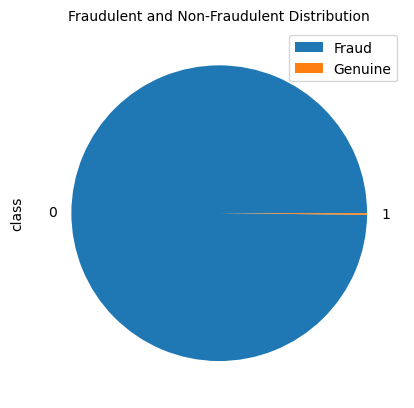

In [9]:
df["class"].value_counts().plot(kind = 'pie')
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=10)
plt.legend(["Fraud", "Genuine"])
plt.show()

**Highlights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

## <a id='describe'>Generate descriptive statistics</a>

In [10]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


**Highlights**
* On an average, credit card transaction is happening at every 94813.86 seconds.
* Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly ** positively skewed**.

## <a id='null'>Finding null values</a>

In [11]:
df.isnull().sum().max()

0

**Highlights**

There are no missing values present in the dataset. It is not necessary that missing values are present in the dataset in the form of  NA, NAN, Zeroes etc, it may be present by some other values also that can be explored by analysing each feature.

## <a id='amountdist'>Distribution of Amount<a id=''>

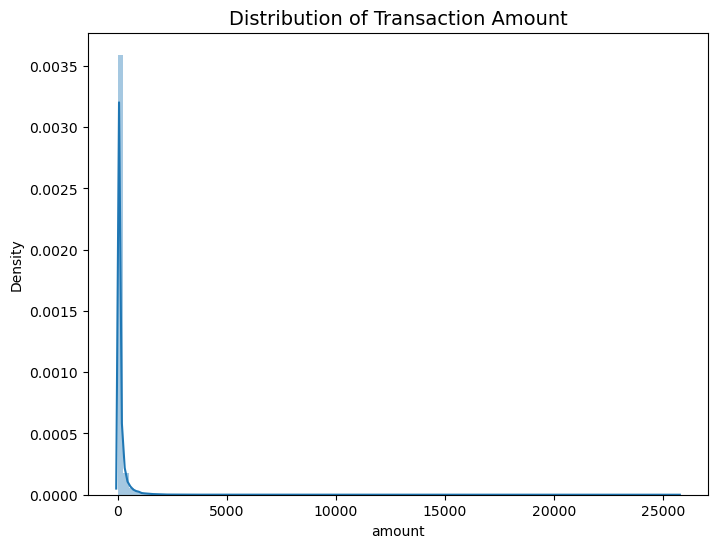

In [11]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.

### Distribution of Amount for Fradulent & Genuine transactions

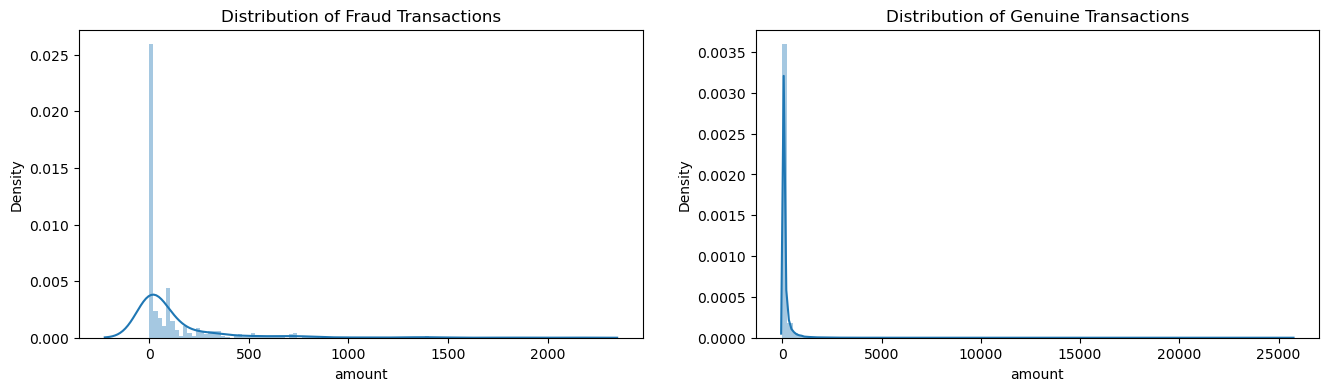

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

**Highlights**

This graph shows that most of the fraud transaction amount is less than 500 dollars. This also shows that the fraud transaction is very high for an amount near to 0, let's find that amount.

In [13]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


**Highlights**

* There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.
* There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

Ref : https://docs.multisafepay.com/tools/zero-authorization/what-is-zero-authorization/

In [14]:
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


### Distribution of Amount w.r.t Class

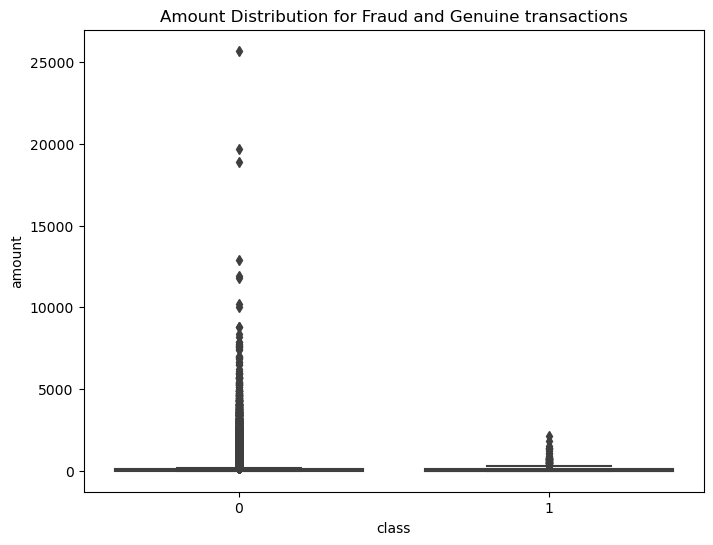

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also, we should be conscious about that these **outliers should not be the fraudulent transaction**. Generally, fraudulent transactions of the very big amount and removing them from the data can make the predicting model bais. 

So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.

## <a id='timedist'>Distribution of Time</a>

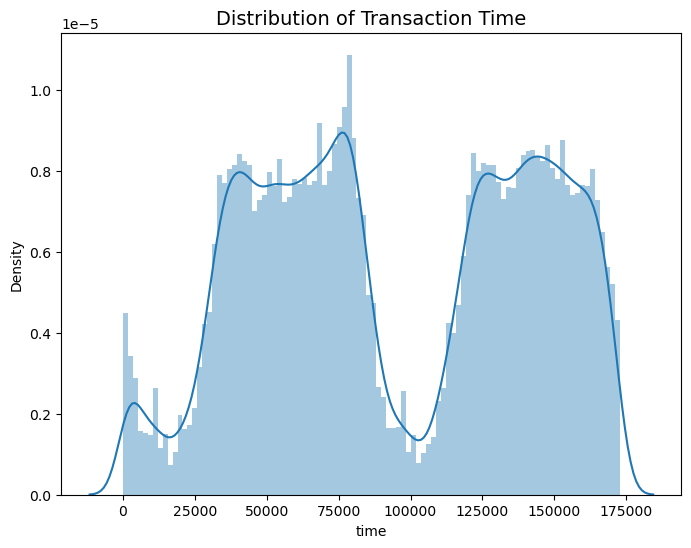

In [16]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

**Highlights**

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

### Distribution of time w.r.t. transactions types

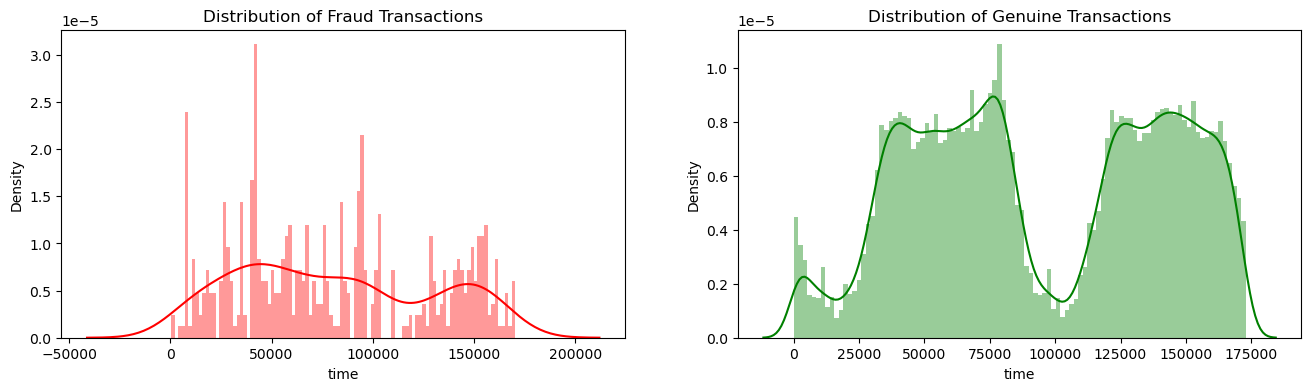

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

## <a id='corr'>Correlation Among Explanatory Variables</a>

Having **too many features** in a model is not always a good thing because it might cause overfitting and worse results when we want to predict values for a new dataset. Thus, **if a feature does not improve your model a lot, not adding it may be a better choice.**

Another important thing is **correlation. If there is a very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting.** However, this does not mean that you must remove one of the highly correlated features. 


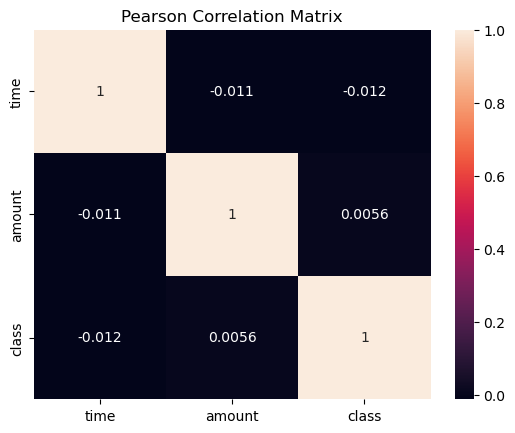

In [18]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount','class']].corr(),annot=True);

**Highlights**

It looks like that no features are highly correlated with any other features.

## <a id='timefeateng'>Feature engineering on Time</a>

### Converting time from second to hour

In [19]:
# Converting time from second to hour
df['time'] = df['time'].apply(lambda sec : (sec/3600))

### Calculating hour of the day

In [20]:
# Calculating hour of the day
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

### Calculating First and Second Day

In [21]:
# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [22]:
df[['time','hour','day','amount','class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [23]:
df['time']

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: time, Length: 284807, dtype: float64

### Fraud and Genuine transaction Day wise

In [24]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    144787
2    140020
Name: day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: day, dtype: int64


No of genuine transactions Day wise:
1    144506
2    139809
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: day, dtype: float64


**Highlights**

* Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

* Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

* Most of the transaction including the fraud transaction happened on day 1.


# <a id='scaleamount'>Scale Amount Feature</a>

* It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a salary has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
* This will result in a better prediction model.

**PCA Transformation**: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

**Scaling**: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

## <a id='scalelog'>1. Scale amount by Log</a>

**Scaling using the log**: There are two main reasons to use logarithmic scales in charts and graphs. 
* The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data. 
* The second is to show per cent change or multiplicative factors. 

In [25]:
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df['amount_log'] = np.log(df.amount + 0.0001)

## <a id='scalestand'>2. Scale  amount by Standardization</a>

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

$$ z = \frac{x_i - \mu}{\sigma} $$

In [26]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

## <a id='scalenorm'>3. Scale  amount by Normalization</a>

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

$$ x_{norm} = \frac{x_i - x_{min}}{x_{max}-x_{min}} $$

In [27]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['amount_minmax'] = mm.fit_transform(df['amount'].values.reshape(-1,1))

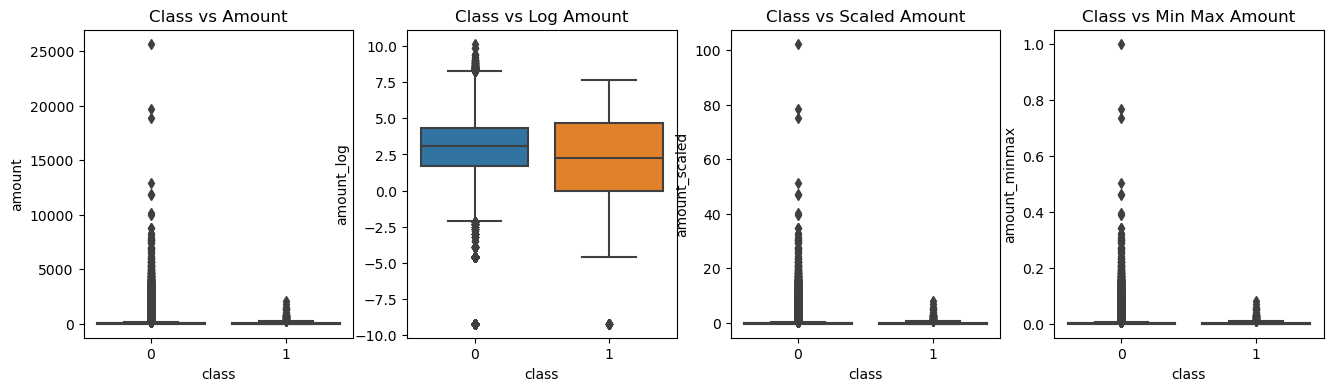

In [28]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="class",y="amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

**Hightlights**

* We can see a slight difference in the log amount of our two Classes. 
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
* **By seeing the above three graphs, I think scaling the amount by log will best suit for our model.**

In [29]:
df[['time','hour','day','amount','amount_log','amount_scaled','amount_minmax','class']]

,time,hour,day,amount,amount_log,amount_scaled,amount_minmax,class
0,0.000000,0,1,149.62,5.008099,0.244964,0.005824,0
1,0.000000,0,1,2.69,0.989578,-0.342475,0.000105,0
2,0.000278,0,1,378.66,5.936639,1.160686,0.014739,0
3,0.000278,0,1,123.50,4.816242,0.140534,0.004807,0
4,0.000556,0,1,69.99,4.248354,-0.073403,0.002724,0
...,...,...,...,...,...,...,...,...
284802,47.996111,23,2,0.77,-0.261235,-0.350151,0.000030,0
284803,47.996389,23,2,24.79,3.210444,-0.254117,0.000965,0
284804,47.996667,23,2,67.88,4.217743,-0.081839,0.002642,0
284805,47.996667,23,2,10.00,2.302595,-0.313249,0.000389,0


# <a id='pickle'>Saving preprossed data as serialized files</a>
* To deploy the predictive models built we save them along with the required data files as serialized file objects
* We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared

In [30]:
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: C:\Users\subha


In [31]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008099,0.244964,0.005824
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,1,0.989578,-0.342475,0.000105
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936639,1.160686,0.014739
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816242,0.140534,0.004807
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,1,4.248354,-0.073403,0.002724


In [31]:
df.shape

(284807, 36)

# <a id='splitdata'>Splitting data into Training and Testing samples</a>

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [32]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_log', 'amount_scaled', 'amount_minmax'],
      dtype='object')

**Highlights**

* We have created few new features like an hour, day, scaled amount. However, these are just for visualization purpose only, not for building the model.

In [33]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['time','class','hour','day','amount','amount_minmax','amount_scaled'],axis=1)
y = df['class']

In [35]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989578
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816242
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.261235
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210444
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217743
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302595


In [34]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


#### Let's Discuss Next Steps - 

1  __Classification Models__

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier 

2  __Class Imbalance Solutions__

- SMOTE
- ADASYN

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score

# <a id='modelbuild'>Model Building</a>

##### We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

# <a id='logreg'>1. Logistic Regression</a>

In [35]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

### Predict from Test set

In [36]:
y_pred = logreg.predict(X_test)

### <a id='modevel'>Model Evolution</a>

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.87      0.61      0.72       144

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [38]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99919
AUC : 0.80548
Precision : 0.87129
Recall : 0.61111
F1 : 0.71837




In [39]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85342
1      101
dtype: int64

**There are originally 144 fraud transactions and our model predicted only 101 fraud transaction. So the accuracy of our model should be ${101}\over{144}$

In [40]:
101/144


0.7013888888888888

So 70.39% should be our accuracy.

**However, this not the case. Actually there are originally 144 fraud transactions and 85299 genuine transactions in the test dataset. However, our model predicted only 101 fraud transaction. Also, it should be kept in mind that these 101 predicted fraud transaction may not be identified correctly. It means that these predicted 101 fraud transactions are NOT only from 144 originally fraud transaction, but they may also be from genuine transactions as well.**

We will see our real accuracy in below cells.

### <a id='modevelmatrix'>Model Evolution Matrix</a>

Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.

**Let's get to know the terminology and Structure first**

A confusion matrix is defined into four parts : __{ TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted)__
Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative <br>
__P__ redicted - __R__ ows and __A__ ctual as __C__ olumns <br>




### Accuracy , Precision and Recall

##### __Accuracy__ : The most used and classic classification metric : Suited for binary classification problems.

$$  \text{Accuracy} = \frac{( TP + TN ) }{ (TP + TN + FP + FN )}$$

Basically Rightly predicted results amongst all the results , used when the classes are balanced

##### __Precision__ : What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !

$$ \text{Precision} = \frac{( TP )}{( TP + FP )} $$

##### __Sensitivity or Recall__ : What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible

$$ \text{Recall} = \frac{(TP)}{( TP + FN )} $$

##### __F1 Score__ : Harmonic mean of Precision and Recall. It basically maintains a balance between the precision and recall for your classifier

$$ F1 = \frac{2 * (\text{ precision } * \text{ recall })}{(\text{ precision } + \text{ recall } )} $$



**Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.**


**In reference of our case**:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.

Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85286,    13],
       [   56,    88]], dtype=int64)

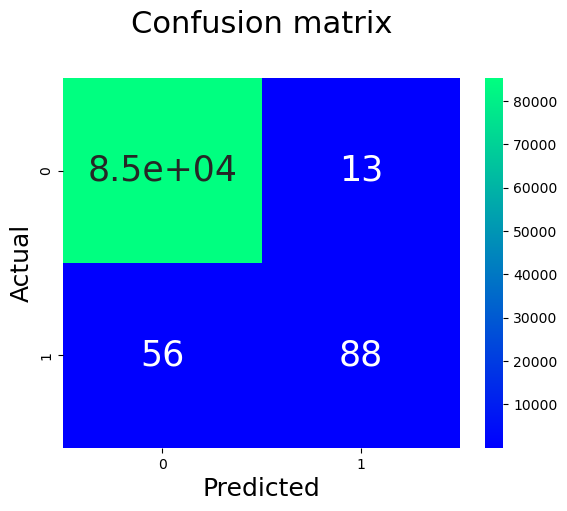

In [43]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" )

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

**There are 88 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.**

**True Negative** - 85286 (truely saying negative - genuine transaction correctly identified as genuine)

**True Postive** - 88 (truely saying positive - fraud transaction correctly identified as fraud)

**False Negative** - 56 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

**False Positive** - 13 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

#### We already know that we have 144 fraud transaction in our test dataset, but our model predicted only 88 fraud transaction. So the real accuracy of our model is ${88}\over{144}$

### <a id='roccurve'>Receiver Operating Characteristics (ROC)</a>

The ROC is a performance measurement for classification problems at various thresholds. It is essentially a probability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to **distinguish between two outcomes**. It defines if a model can create a clear boundary between the postive and the negative class. 

<div style='width:100%;'>
   <div style='width:30%; float:left;'> <img  src ='https://i.imgur.com/fzBGUDy.jpg' /> </div>
   <div style=''> <img  src ='https://i.imgur.com/hZQiNCn.png' /> </div>
</div>


Let's talk about some definitions first: 

##### __Sensitivity__ or __Recall__

The sensitivity of a model is defined by the proportion of actual positives that are classified as Positives , i.e = TP / ( TP + FN )

$$ \text{Recall or Sensitivity} = \frac{(TP)}{( TP + FN )} $$



##### __Specificity__

The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )

$$ \text{Specificity} = \frac{(TN)}{( TN + FP )} $$


As we can see that both are independent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

### ROC CURVE

It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. 
It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.



<img src='https://i.imgur.com/GRuZpez.gif'>

In [44]:
metrics.roc_auc_score(y_test , y_pred) 

0.805479353020942

In [45]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99549115e-01, 4.50885114e-04],
       [9.99867302e-01, 1.32697773e-04],
       [9.99800822e-01, 1.99178105e-04],
       ...,
       [9.99654918e-01, 3.45081568e-04],
       [9.99606747e-01, 3.93253263e-04],
       [9.99803917e-01, 1.96083285e-04]])

AUC -  0.805479353020942 



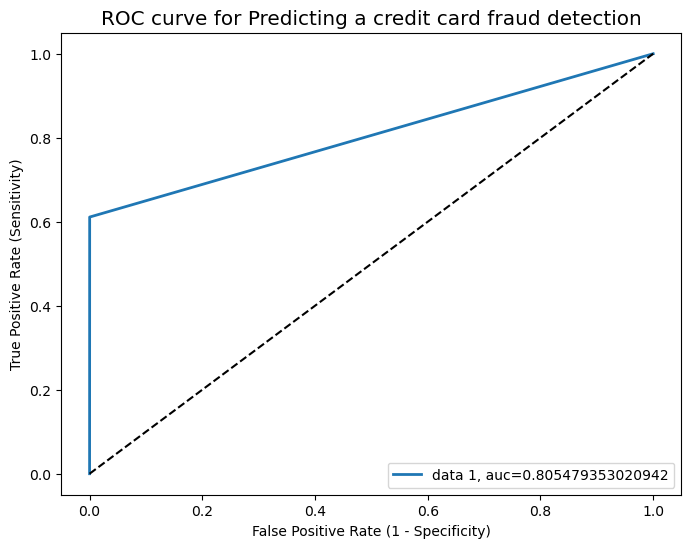

In [46]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.718


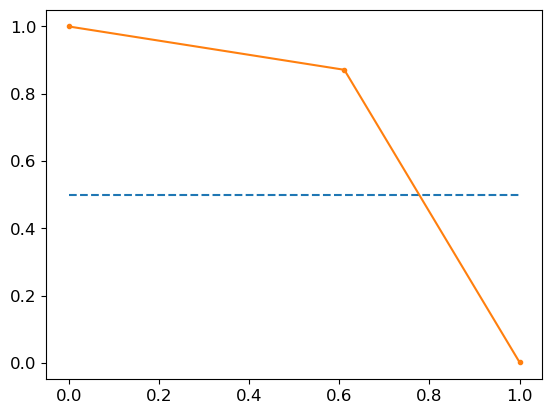

In [47]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

# <a id='classimbalance'>Class Imbalance</a>

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.  If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets.




Let's fix the class Imbalance and apply some sampling techniques.




## <a id='smote'>Synthetic Minority OverSampling Technique (SMOTE)</a>

In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. 

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


## <a id='adasyn'>Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)</a>

ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

## Import imbalace technique algorithims

In [48]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN


## <a id='logregsomote'>1.4 Logistic Regression with SMOTE data</a>

In [49]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [50]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [51]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.97602
AUC : 0.93599
Precision : 0.05964
Recall : 0.89583
F1 : 0.11183


AUC -  0.9359939008663642 



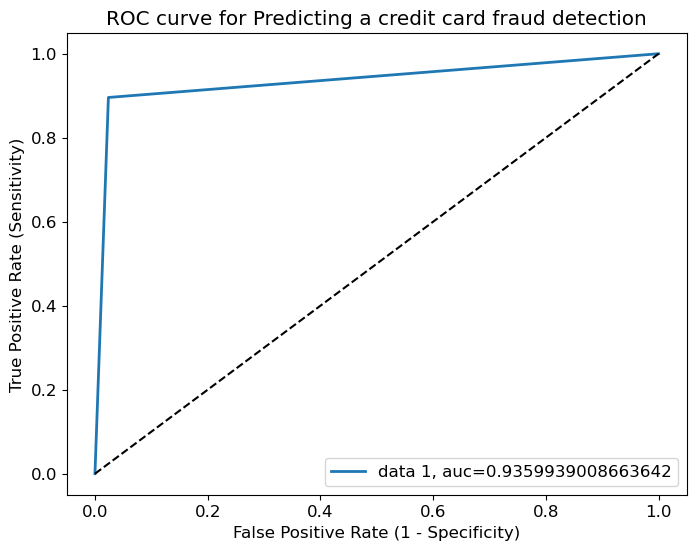

In [52]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.112


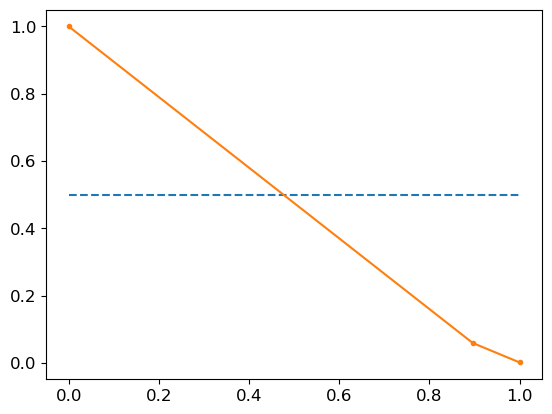

In [53]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

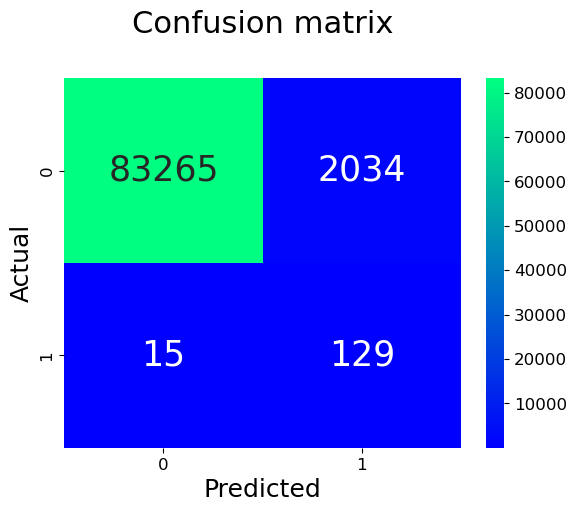

In [54]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()


### We have seen that imbalance dataset have Recall score of only 61.11%. It means that creating a model from the imbalanced dataset is highly biased towards genuine transactions and creates a model which is not able to predict the fraudulent transactions correctly. However, the balanced dataset has Recall score of above 94.444%.

## <a id='logregadasyn'>1.5 Logistic Regression with ADASYN data</a>

In [55]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199012})


In [56]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)
                              

In [57]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.91831
AUC : 0.93151
Precision : 0.01921
Recall : 0.94444
F1 : 0.03765


AUC -  0.9315124835382986 



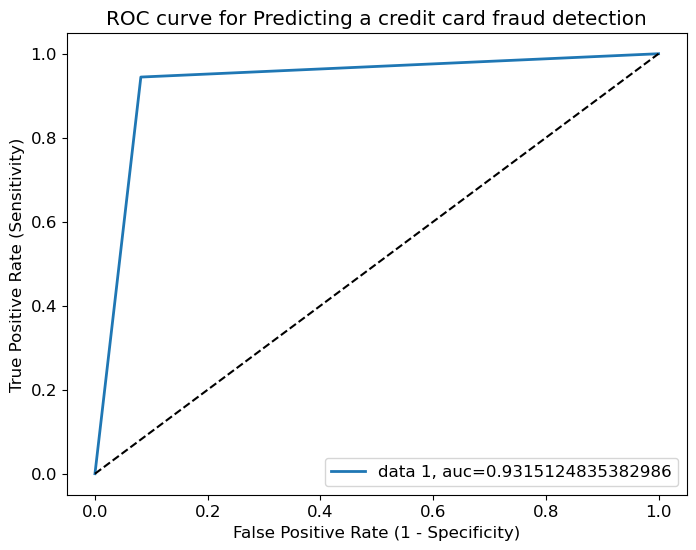

In [58]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.038


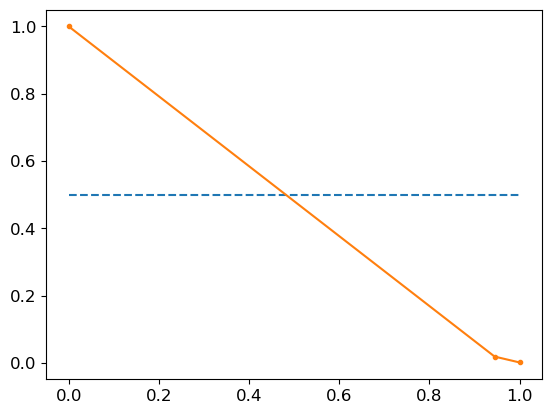

In [59]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### We have seen that imbalance dataset have Recall score of only 61.11%. It means that creating a model from the imbalanced dataset is highly biased towards genuine transactions and creates a model which is not able to predict the fraudulent transactions correctly. However, the balanced dataset has Recall score of above 94.444%.

# <a id='modelwith'>Building different models with different balanced datasets</a>
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

### Logistic Regression (LR)

Model Name : LR imbalance
Train Accuracy :0.99916
Test Accuracy :0.99920
Train AUC : 0.80452
Test AUC : 0.80549
Train Precision : 0.87243
Test Precision : 0.88000
Train Recall : 0.60920
Test Recall : 0.61111
Train F1 : 0.71743
Test F1 : 0.72131
Confusion Matrix : 
 [[85287    12]
 [   56    88]]


Model Name : LR SMOTE
Train Accuracy :0.94666
Test Accuracy :0.97604
Train AUC : 0.94666
Test AUC : 0.93601
Train Precision : 0.97478
Test Precision : 0.05969
Train Recall : 0.91704
Test Recall : 0.89583
Train F1 : 0.94503
Test F1 : 0.11193
Confusion Matrix : 
 [[83267  2032]
 [   15   129]]


Model Name : LR ADASYN
Train Accuracy :0.88453
Test Accuracy :0.91866
Train AUC : 0.88453
Test AUC : 0.93153
Train Precision : 0.91150
Test Precision : 0.01921
Train Recall : 0.85174
Test Recall : 0.94444
Train F1 : 0.88061
Test F1 : 0.03766
Confusion Matrix : 
 [[78357  6942]
 [    8   136]]




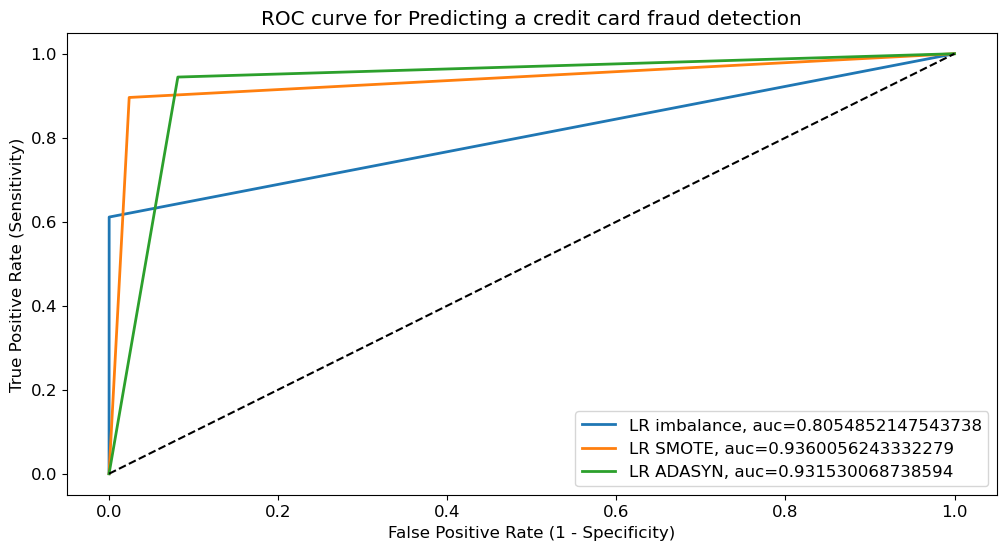

In [62]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'), X_train,y_train,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

### Decision Tree (DT)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :0.99912
Train AUC : 1.00000
Test AUC : 0.87477
Train Precision : 1.00000
Test Precision : 0.73469
Train Recall : 1.00000
Test Recall : 0.75000
Train F1 : 1.00000
Test F1 : 0.74227
Confusion Matrix : 
 [[85260    39]
 [   36   108]]


Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99803
Train AUC : 1.00000
Test AUC : 0.89156
Train Precision : 1.00000
Test Precision : 0.45200
Train Recall : 1.00000
Test Recall : 0.78472
Train F1 : 1.00000
Test F1 : 0.57360
Confusion Matrix : 
 [[85162   137]
 [   31   113]]


Model Name : DT ADASYN
Train Accuracy :1.00000
Test Accuracy :0.99791
Train AUC : 1.00000
Test AUC : 0.88803
Train Precision : 1.00000
Test Precision : 0.43243
Train Recall : 1.00000
Test Recall : 0.77778
Train F1 : 1.00000
Test F1 : 0.55583
Confusion Matrix : 
 [[85152   147]
 [   32   112]]




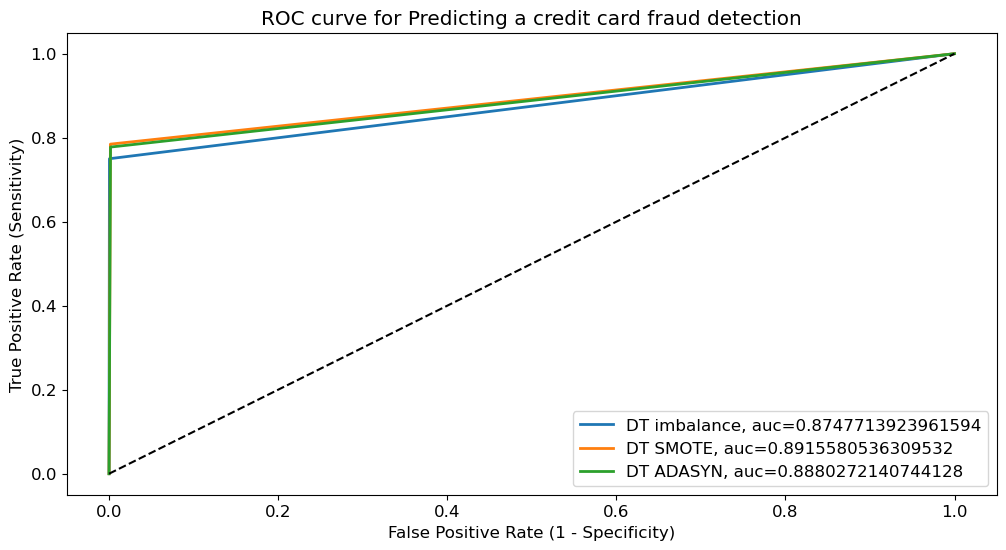

In [63]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

### Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :0.99958
Train AUC : 1.00000
Test AUC : 0.89580
Train Precision : 1.00000
Test Precision : 0.95000
Train Recall : 1.00000
Test Recall : 0.79167
Train F1 : 1.00000
Test F1 : 0.86364
Confusion Matrix : 
 [[85293     6]
 [   30   114]]


Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99953
Train AUC : 1.00000
Test AUC : 0.91657
Train Precision : 1.00000
Test Precision : 0.88235
Train Recall : 1.00000
Test Recall : 0.83333
Train F1 : 1.00000
Test F1 : 0.85714
Confusion Matrix : 
 [[85283    16]
 [   24   120]]


Model Name : RF ADASYN
Train Accuracy :1.00000
Test Accuracy :0.99950
Train AUC : 1.00000
Test AUC : 0.92002
Train Precision : 1.00000
Test Precision : 0.85816
Train Recall : 1.00000
Test Recall : 0.84028
Train F1 : 1.00000
Test F1 : 0.84912
Confusion Matrix : 
 [[85279    20]
 [   23   121]]




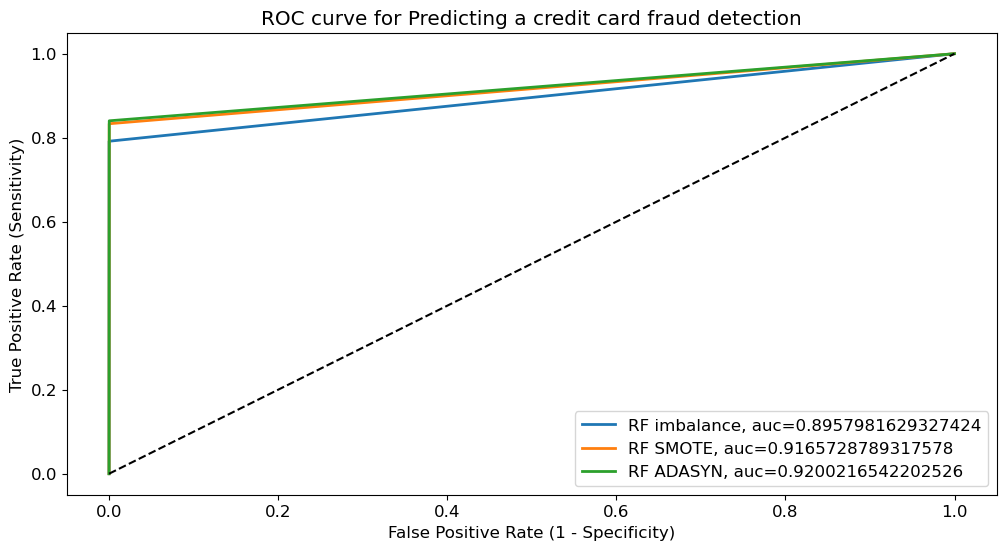

In [64]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

### Naive Bayes (NB)

Model Name : NB imbalance
Train Accuracy :0.97796
Test Accuracy :0.97788
Train AUC : 0.90147
Test AUC : 0.90920
Train Precision : 0.06213
Test Precision : 0.06087
Train Recall : 0.82471
Test Recall : 0.84028
Train F1 : 0.11556
Test F1 : 0.11351
Confusion Matrix : 
 [[83432  1867]
 [   23   121]]


Model Name : NB SMOTE
Train Accuracy :0.91354
Test Accuracy :0.97451
Train AUC : 0.91354
Test AUC : 0.91444
Train Precision : 0.97133
Test Precision : 0.05395
Train Recall : 0.85225
Test Recall : 0.85417
Train F1 : 0.90790
Test F1 : 0.10149
Confusion Matrix : 
 [[83142  2157]
 [   21   123]]


Model Name : NB ADASYN
Train Accuracy :0.74629
Test Accuracy :0.95956
Train AUC : 0.74628
Test AUC : 0.92082
Train Precision : 0.92989
Test Precision : 0.03562
Train Recall : 0.53274
Test Recall : 0.88194
Train F1 : 0.67739
Test F1 : 0.06848
Confusion Matrix : 
 [[81861  3438]
 [   17   127]]




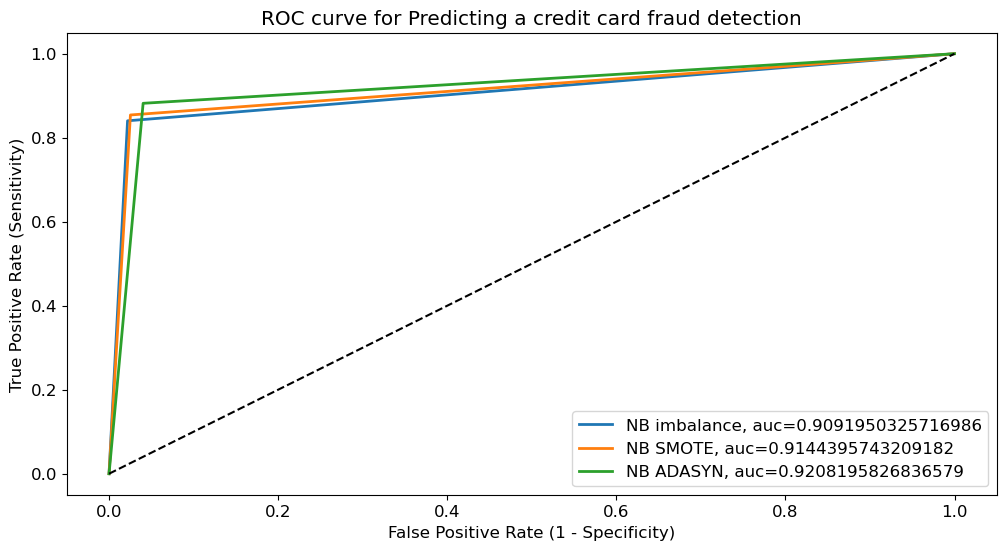

In [65]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

In [66]:
data1 = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data1) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
6,RF imbalance,0.999579,0.895798,0.950000,0.791667,0.863636
7,RF SMOTE,0.999532,0.916573,0.882353,0.833333,0.857143
8,RF ADASYN,0.999497,0.920022,0.858156,0.840278,0.849123
3,DT imbalance,0.999122,0.874771,0.734694,0.750000,0.742268
0,LR imbalance,0.999204,0.805485,0.880000,0.611111,0.721311
4,DT SMOTE,0.998034,0.891558,0.452000,0.784722,0.573604
5,DT ADASYN,0.997905,0.888027,0.432432,0.777778,0.555831
9,NB imbalance,0.977880,0.909195,0.060865,0.840278,0.113508
1,LR SMOTE,0.976043,0.936006,0.059695,0.895833,0.111931
10,NB SMOTE,0.974509,0.914440,0.053947,0.854167,0.101485


# <a id='concl'>Conclusion</a>

All of the scores for Random Forest with the three methods are very promising for our dataset. Each model has a high true positive rate and a low false-positive rate, which is exactly what we’re looking for.We were able to accurately identify fraudulent credit card transactions using random forest models. We, therefore, chose the random forest model with SMOTE method as the better model, which obtained  F1 score of 85.7%  on the test set.